# 01 | EDA & Feature Engineering
Credit Card Fraud Detection

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [67]:
np.random.seed(42)
n_transactions = 1000
n_customers = 50

df = pd.DataFrame({
    "transaction_id": range(1, n_transactions + 1),
    "customer_id": np.random.randint(1, n_customers + 1, n_transactions),
    "amount": np.round(np.random.exponential(scale=50, size=n_transactions), 2),
    "merchant_category": np.random.choice(
        ["grocery", "electronics", "travel", "clothing", "restaurants"], 
        n_transactions
    ),
    "transaction_time": pd.to_datetime(
        np.random.randint(
            pd.Timestamp("2025-01-01").value // 10**9, 
            pd.Timestamp("2025-12-31").value // 10**9, 
            n_transactions
        ), unit='s'
    ),
    "device": np.random.choice(["mobile", "desktop", "tablet"], n_transactions),
    "location": np.random.choice(["NY", "CA", "TX", "FL", "IL"], n_transactions),
    "is_fraud": np.random.choice([0, 1], n_transactions, p=[0.95, 0.05])
})

df.head()


,transaction_id,customer_id,amount,merchant_category,transaction_time,device,location,is_fraud
0,1,39,135.67,travel,2025-09-30 09:45:15,desktop,FL,0
1,2,29,0.38,clothing,2025-05-08 10:23:06,tablet,NY,0
2,3,15,12.77,restaurants,2025-05-31 04:34:46,mobile,NY,0
3,4,43,22.73,clothing,2025-10-14 14:05:55,mobile,FL,0
4,5,8,33.45,electronics,2025-06-25 07:55:30,tablet,NY,0


In [68]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'])
df = df.sort_values(by=['customer_id', 'transaction_time'])

df['cust_avg_amount'] = df.groupby('customer_id')['amount'].transform('mean')
df['cust_txn_count'] = df.groupby('customer_id')['transaction_id'].transform('count')
df['time_since_last_txn'] = df.groupby('customer_id')['transaction_time'].diff().dt.total_seconds() / 60
df['time_since_last_txn'].fillna(df['time_since_last_txn'].median(), inplace=True)
df['amount_norm'] = df['amount'] / df['cust_avg_amount']
df = pd.get_dummies(df, columns=['merchant_category', 'device', 'location'], drop_first=True)

df.head()

,transaction_id,customer_id,amount,transaction_time,is_fraud,cust_avg_amount,cust_txn_count,time_since_last_txn,amount_norm,merchant_category_electronics,merchant_category_grocery,merchant_category_restaurants,merchant_category_travel,device_mobile,device_tablet,location_FL,location_IL,location_NY,location_TX
815,816,1,105.14,2025-01-02 14:14:46,0,57.718333,24,16901.575000,1.821605,False,False,True,False,True,False,False,False,True,False
693,694,1,45.53,2025-01-23 00:15:40,0,57.718333,24,29400.900000,0.788831,False,False,False,False,False,True,False,True,False,False
723,724,1,44.39,2025-02-19 18:41:55,0,57.718333,24,39986.250000,0.769080,False,False,True,False,True,False,False,False,True,False
930,931,1,85.38,2025-03-18 19:47:20,0,57.718333,24,38945.416667,1.479253,False,False,False,True,False,True,True,False,False,False
467,468,1,59.49,2025-04-12 23:45:40,0,57.718333,24,36238.333333,1.030695,False,True,False,False,True,False,False,False,True,False


## Feature Engineering Plan

1. Transaction-Level Features
2. Customer-Level Features
3. Location & Velocity Features
4. Historical & Behavioral Features
5. Derived / Engineered Features

Each feature will have:
- Source column(s)
- Transformation / aggregation
- Handling missing values
- Feature type (numeric, categorical)

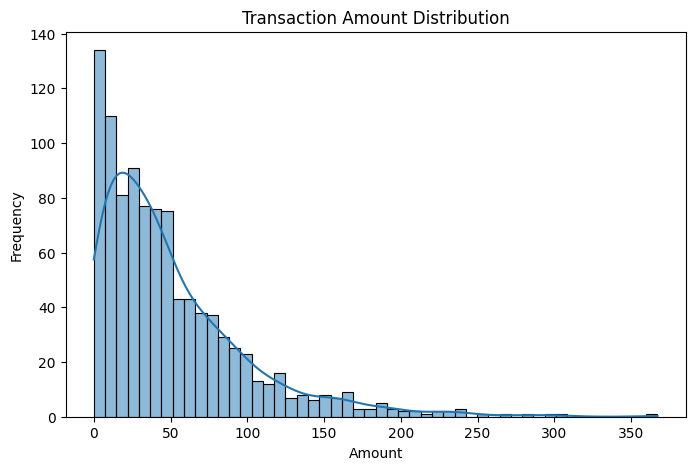

In [69]:
plt.figure(figsize=(8,5))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

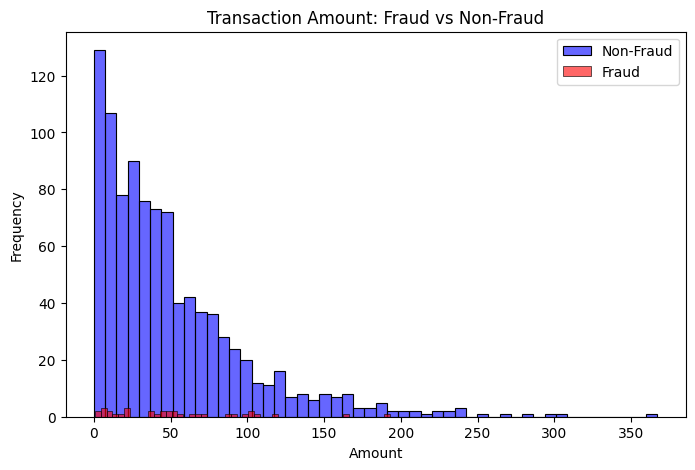

In [70]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['is_fraud']==0]['amount'], color='blue', label='Non-Fraud', bins=50, alpha=0.6)
sns.histplot(df[df['is_fraud']==1]['amount'], color='red', label='Fraud', bins=50, alpha=0.6)
plt.title("Transaction Amount: Fraud vs Non-Fraud")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()

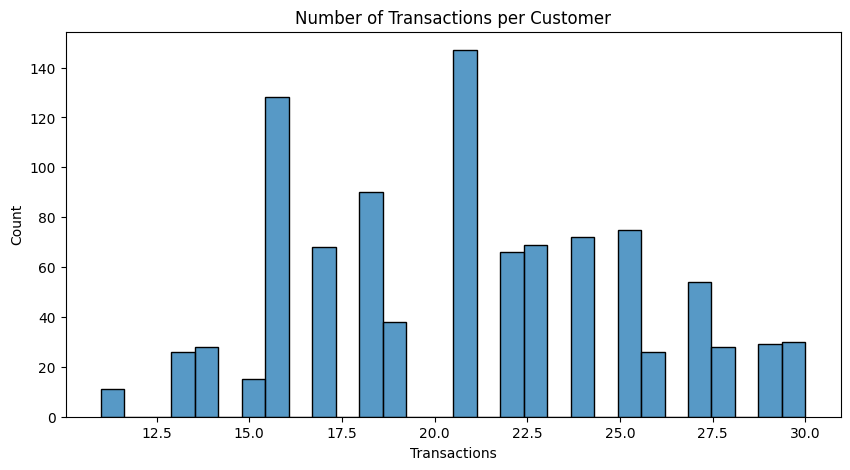

In [71]:
plt.figure(figsize=(10,5))
sns.histplot(df['cust_txn_count'], bins=30)
plt.title("Number of Transactions per Customer")
plt.xlabel("Transactions")
plt.ylabel("Count")
plt.show()

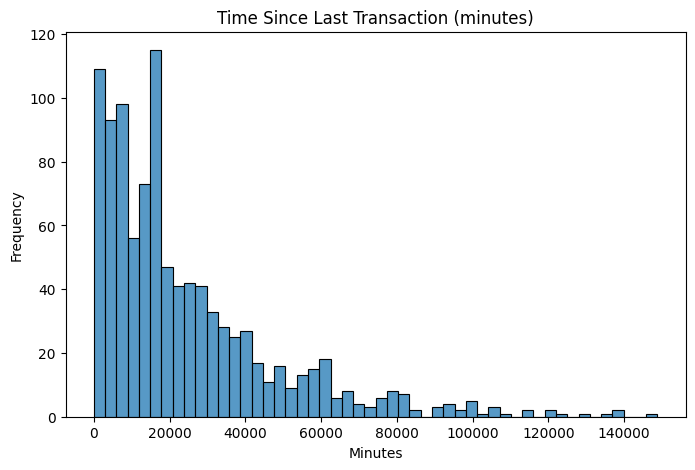

In [72]:
plt.figure(figsize=(8,5))
sns.histplot(df['time_since_last_txn'], bins=50)
plt.title("Time Since Last Transaction (minutes)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

## Next Steps

- Split dataset into train/test sets
- Train baseline ML model (e.g., XGBoost or Logistic Regression)
- Evaluate using cost-sensitive metrics (fraud costs)
- Use SHAP for feature importance / explainability
- Wrap into FastAPI inference API for real-time scoring